<h2 style="color:blue">Library Imports</h2>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

 <h2 style="color:blue">Data Loading</h2>

In [2]:
# Directories for the project's train/test data
train_dir = 'Data/train'
test_dir = 'Data/test'

# Initializing the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the training and testing data respectively
train_data = train_datagen.flow_from_directory(train_dir, target_size=(48, 48), batch_size=64, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(48, 48), batch_size=64, class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


<h2 style="color:blue">Pre-processing and Augmentation</h2>

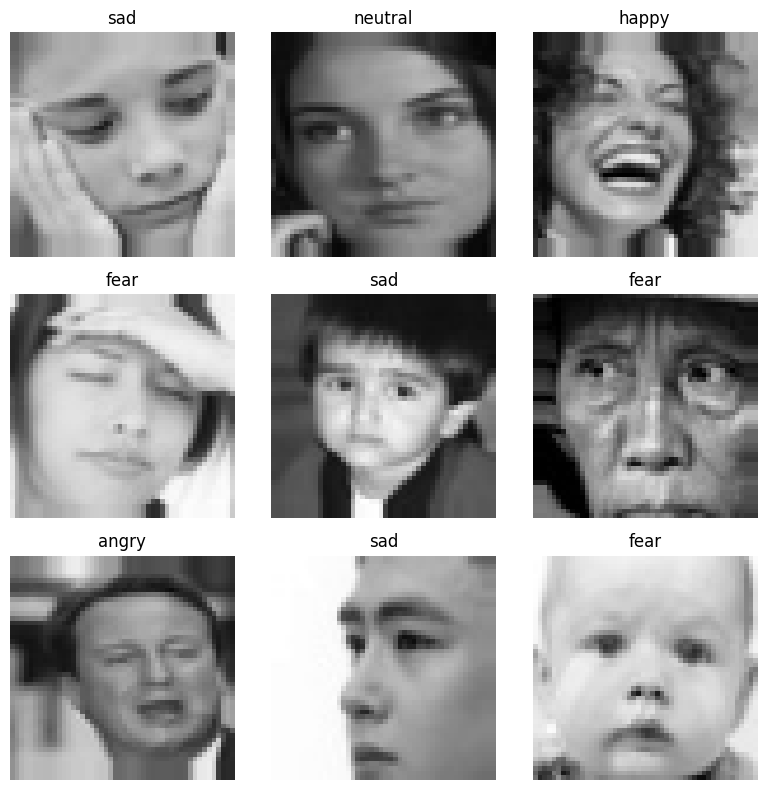

In [3]:
# Visualizing some sample images along with their labels from the dataset
def visualize_samples(data, label_map):
    # Fetching the next batch of images and labels
    sample_images, sample_labels = next(data)
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.ravel()

    for i in range(9):
        # Showing the image
        axes[i].imshow(sample_images[i])
        axes[i].axis('off')

        # Decoding the label (one-hot encoded)
        label_index = np.argmax(sample_labels[i])
        label_name = label_map[label_index]

        # Adding the label as the title of each image
        axes[i].set_title(label_name)

    plt.tight_layout()
    plt.show()

# Getting the class indices from train_data and reverse the dictionary
label_map = {v: k for k, v in train_data.class_indices.items()}

# Visualizing the images with labels
visualize_samples(train_data, label_map)

<h2 style="color:blue">Modeling (CNN Model Design)</h2>

In [4]:
# Creating the CNN Model Architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))  # 7 emotions

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_data, validation_data=test_data, epochs=50, verbose=1)

C:\Users\kevzm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\kevzm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 104s 218ms/step - accuracy: 0.2386 - loss: 1.8271 - val_accuracy: 0.3302 - val_loss: 1.6683
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.3473 - loss: 1.6481 - val_accuracy: 0.4468 - val_loss: 1.4472
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step - accuracy: 0.4143 - loss: 1.5086 - val_accuracy: 0.4884 - val_loss: 1.3471
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 56s 123ms/step - accuracy: 0.4534 - loss: 1.4274 - val_accuracy: 0.5089 - val_loss: 1.2874
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 121ms/step - accuracy: 0.4733 - loss: 1.3786 - val_accuracy: 0.5178 - val_loss: 1.2567
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 56s 123ms/step - accuracy: 0.4935 - loss: 1.3313 - val_accuracy: 0.5222 - val_loss: 1.2608
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 56s 123ms/step - accuracy: 0.5014 - loss: 1.3070 - val_accuracy: 0.5461 - val_loss: 1.1940
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.5196 - loss: 1.2776 - va

<h2 style="color:blue">Model Evaluation and Visualization</h2>

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5880 - loss: 1.1081
Test Loss: 1.0994445085525513, Test Accuracy: 0.5918083190917969


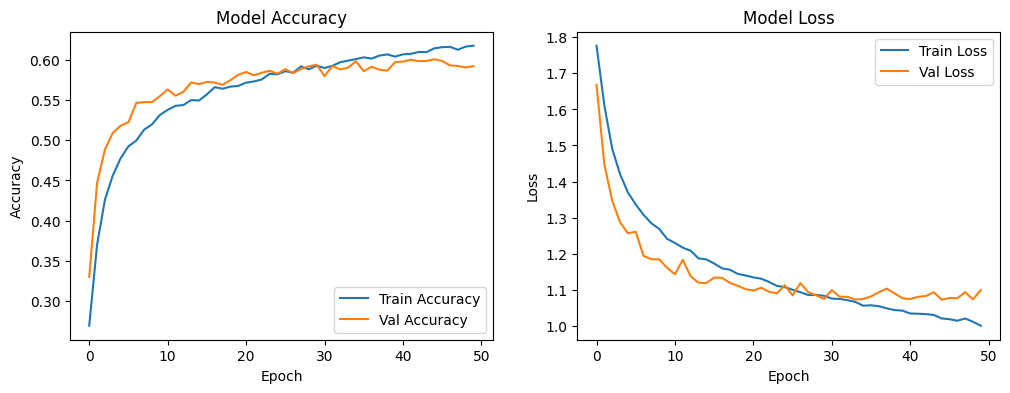

In [5]:
# Evaluating the model performance
results = model.evaluate(test_data)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plotting the training history (accuracy/loss)
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

C:\Users\kevzm\AppData\Local\Temp\ipykernel_9712\4063452274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts, palette="viridis")


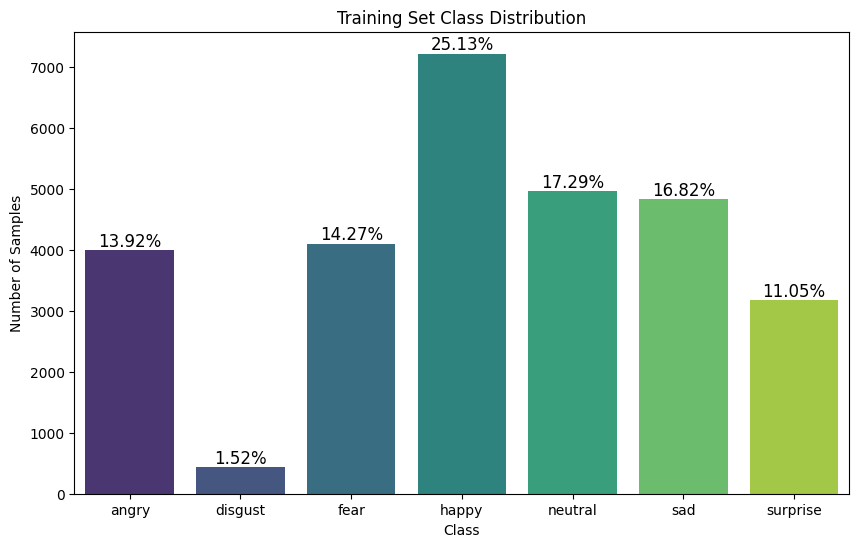

C:\Users\kevzm\AppData\Local\Temp\ipykernel_9712\4063452274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts, palette="viridis")


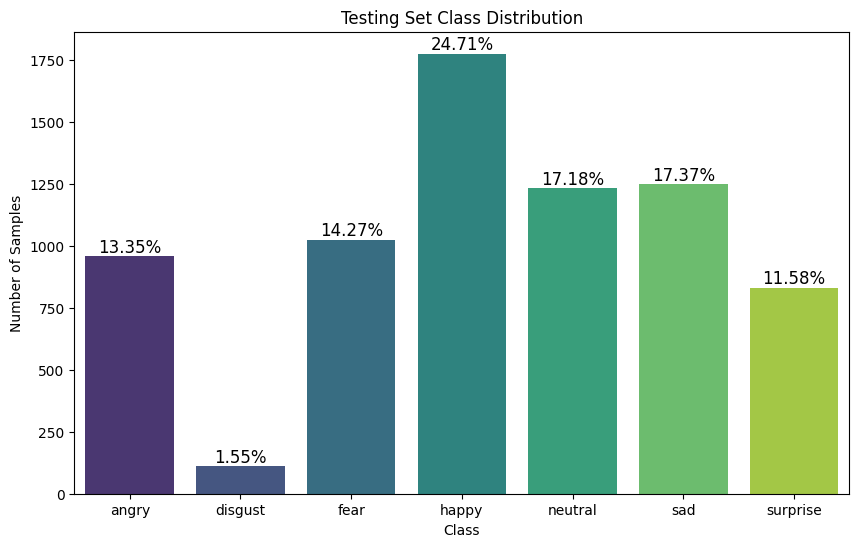

In [6]:
# Getting the distribution of classes in training and testing sets
train_class_counts = np.bincount(train_data.classes)
test_class_counts = np.bincount(test_data.classes)

# Getting class names from train_data (same for test_data)
class_names = list(train_data.class_indices.keys())

# Calculating percentages
train_class_percentages = train_class_counts / np.sum(train_class_counts) * 100
test_class_percentages = test_class_counts / np.sum(test_class_counts) * 100

# Function to plot class distribution
def plot_class_distribution(counts, percentages, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_names, y=counts, palette="viridis")
    
    # Adding percentages on top of each bar
    for i, percentage in enumerate(percentages):
        plt.text(i, counts[i], f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)
    
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Plotting class distribution for training and testing sets
plot_class_distribution(train_class_counts, train_class_percentages, 'Training Set Class Distribution')
plot_class_distribution(test_class_counts, test_class_percentages, 'Testing Set Class Distribution')

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step


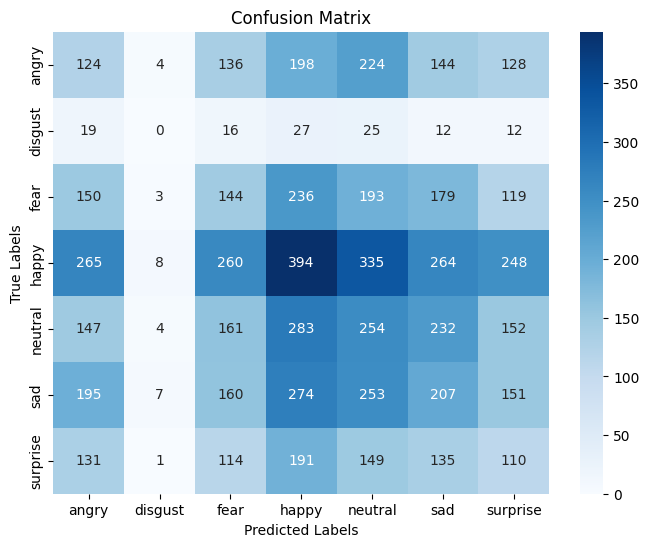

In [7]:
# Getting the predicted labels for the test data
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class indices

# Getting the true labels for the test data
y_true = test_data.classes

# Generating the Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Getting class names from the train_data (they are the same for test_data)
class_names = list(train_data.class_indices.keys())

# Plotting confusion matrix
plot_confusion_matrix(cm, class_names)

<h2 style="color:blue"> Improving Accuracy</h2>

In [8]:
# Adding Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Re-training the model with callbacks
history = model.fit(train_data, validation_data=test_data, epochs=50, callbacks=[early_stopping])

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.6159 - loss: 1.0035 - val_accuracy: 0.5924 - val_loss: 1.1024
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 57s 125ms/step - accuracy: 0.6209 - loss: 1.0049 - val_accuracy: 0.5974 - val_loss: 1.0757
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.6263 - loss: 0.9937 - val_accuracy: 0.6011 - val_loss: 1.0730
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.6236 - loss: 0.9908 - val_accuracy: 0.5968 - val_loss: 1.0773
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.6226 - loss: 0.9947 - val_accuracy: 0.6071 - val_loss: 1.0729
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.6291 - loss: 0.9823 - val_accuracy: 0.5996 - val_loss: 1.0876
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 57s 125ms/step - accuracy: 0.6282 - loss: 0.9756 - val_accuracy: 0.5992 - val_loss: 1.0866
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.6276 - loss: 0

In [9]:
# Saving the model after training
model.save('emotion_detection_model.h5')